<a href="https://colab.research.google.com/github/RidmieWee/DS_Project/blob/main/3.%20Implementation/drowsiness_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten
from sklearn.model_selection import train_test_split
from google.colab import drive

In [2]:
# Mount into the drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploratary Data Analysis

In [3]:
# Load one image
img = cv2.imread('../content/drive/MyDrive/Research/data/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)

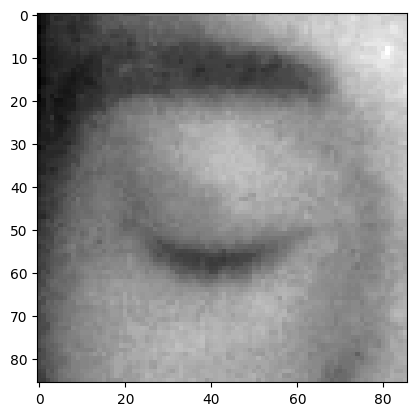

In [4]:
# Display that image
plt.imshow(img, cmap="gray")

In [5]:
# Define data folder and classes
images = '../content/drive/MyDrive/Research/data'
categories = ['Closed_Eyes', 'Opened_Eyes']

In [6]:
# Define a array for stre images
data = []

# Define a function to extract data from folder
def extract_data():
    # Iterate over each folder in directory
    for category in categories:
        # Defie the path to directory
        path = os.path.join(images, category)
        # Extract the index
        class_num = categories.index(category)
        # Iterate over each imane
        for img in os.listdir(path):
            try:
                # Read image
                img_array = cv2.imread(os.path.join(path, img))
                # Add image and labelinto new array
                data.append([img_array, category])
            # Check for any errors to ignore
            except Exception as e:
                pass

In [7]:
# Call function to extract data
extract_data()

In [8]:
# Ensure the data length
print(len(data))

10000


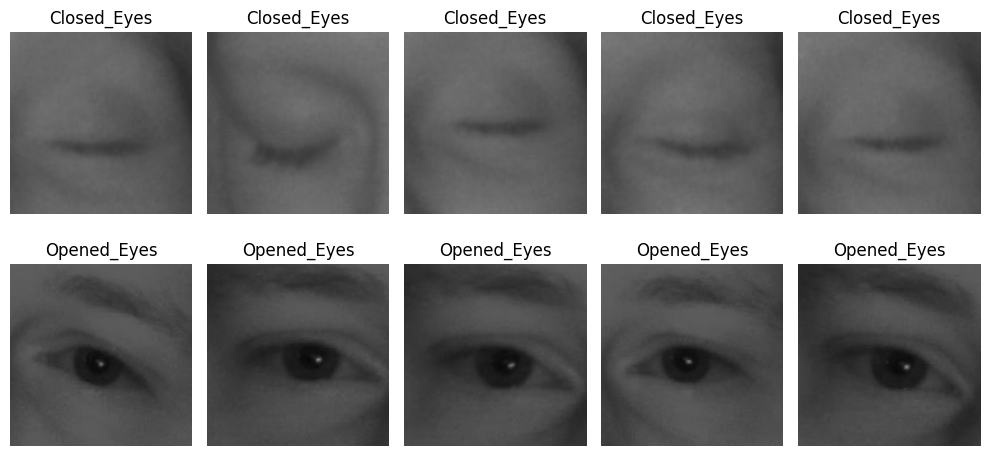

In [9]:
# Explore extract images

# Define the number of rows and columns
rows = 2
columns = 5

# Define size for the figure
plt.figure(figsize=(10, 5))

# Iterate over each class
for class_name in categories:
    # Filter images of each class
    class_images = [img_data for img_data in data if img_data[1] == class_name]
    # Plot images of each class
    for i in range(min(len(class_images), 5)):
        plt.subplot(rows, columns, categories.index(class_name) * 5 + i + 1)
        plt.imshow(class_images[i][0])
        plt.title(class_name)
        plt.axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [10]:
# Calculate image statistics

# Define a function to extract image statistics
def calculate_image_statistics(data):
    # Define dictionary to store statistics for each category
    statistics = {'Closed_Eyes': [], 'Opened_Eyes': []}
    # Iterate over each image-category pair
    for image, category in data:
        # Convert the image to grayscale
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Add mean pixel intensity
        statistics[category].append(np.mean(grayscale_image))
    # Return new dictionary
    return statistics

# Call function to calculate image statistics
image_statistics = calculate_image_statistics(data)

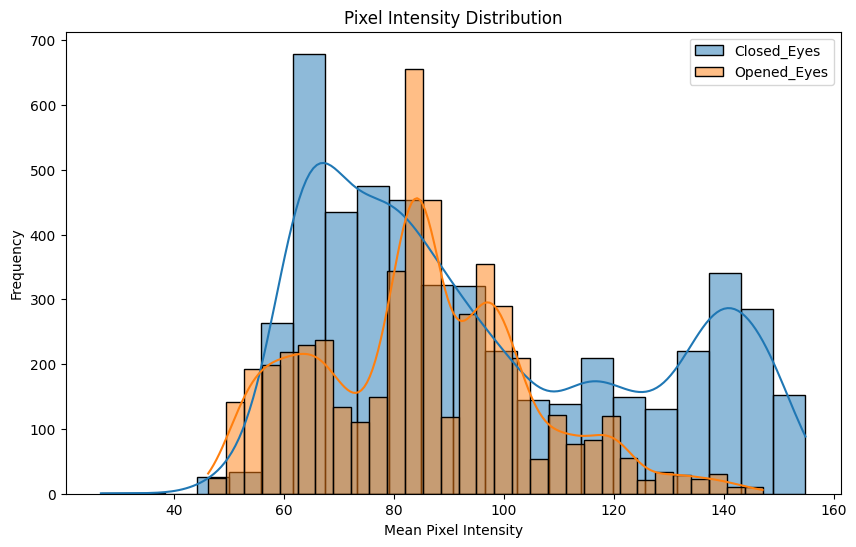

In [11]:
# Plot histograms of pixel intensity distributions
# Define a figure
plt.figure(figsize=(10, 6))

# Iterte over each category
for category in categories:
    # Plot data points as a histogram
    sns.histplot(image_statistics[category], kde=True, label=category, alpha=0.5)

# Define labels for axies and title
plt.xlabel('Mean Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution')
# Add legend
plt.legend()

# Plot the graph
plt.show()

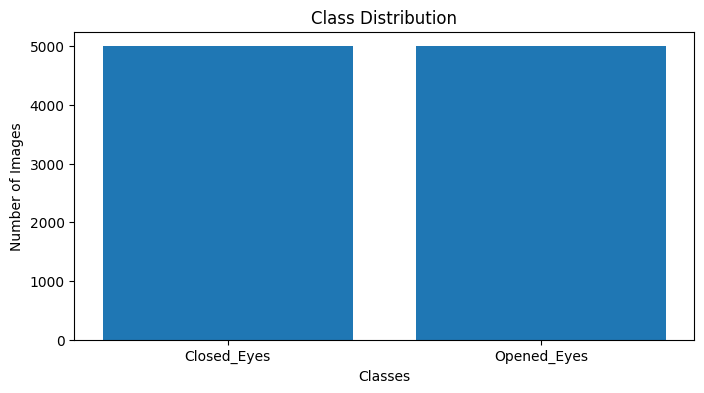

In [12]:
# Identify class imbalance

# Define a figure
plt.figure(figsize=(8, 4))

# Calculate the total images
image_count = {category: len([img for img,
                              cat in data if cat == category])
                              for category in categories}

# Plot the count of each category
plt.bar(image_count.keys(), image_count.values())

# Define axis labels and titles
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution')

# Show the plot
plt.show()

In [13]:
# Check the shape of each image

# Iterate over each image
for image, category in data:

    # Check the shape
    image_shape = image.shape

    # Print the shape
    print(f"Image shape: {image_shape}, Category: {category}")

Streaming output truncated to the last 5000 lines.
Image shape: (134, 134, 3), Category: Opened_Eyes
Image shape: (117, 117, 3), Category: Opened_Eyes
Image shape: (116, 116, 3), Category: Opened_Eyes
Image shape: (134, 134, 3), Category: Opened_Eyes
Image shape: (116, 116, 3), Category: Opened_Eyes
Image shape: (137, 137, 3), Category: Opened_Eyes
Image shape: (120, 120, 3), Category: Opened_Eyes
Image shape: (123, 123, 3), Category: Opened_Eyes
Image shape: (137, 137, 3), Category: Opened_Eyes
Image shape: (75, 75, 3), Category: Opened_Eyes
Image shape: (136, 136, 3), Category: Opened_Eyes
Image shape: (132, 132, 3), Category: Opened_Eyes
Image shape: (136, 136, 3), Category: Opened_Eyes
Image shape: (112, 112, 3), Category: Opened_Eyes
Image shape: (139, 139, 3), Category: Opened_Eyes
Image shape: (137, 137, 3), Category: Opened_Eyes
Image shape: (131, 131, 3), Category: Opened_Eyes
Image shape: (118, 118, 3), Category: Opened_Eyes
Image shape: (139, 139, 3), Category: Opened_Eyes
I

In [14]:
# Define the newsize
new_size = (64, 64)

# Iterate over each image
for i in range(len(data)):

    # Extract image and category
    image, category = data[i]

    # Resize the image
    resized_image = cv2.resize(image, new_size)

    # Add the image with new size
    data[i] = (resized_image, category)

In [15]:
# Extract one image
image1 = data[0][0]

# Check shape of the image
image_shape = image1.shape

# Print the shape
print(image_shape)

(64, 64, 3)


In [16]:
# Iterate over each image
for i in range(len(data)):
    # Extract the images and label
    img_array, category = data[i]

    # Convert it into grayscale
    grayscale_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

    # Update the data list with the grayscale image
    data[i] = [grayscale_img, category]


In [17]:
# Extract one image
image1 = data[0][0]

# Check shape of the image
image_shape = image1.shape

# Print the shape
print(image_shape)

(64, 64)


# Data Preprocessing

In [18]:
# Construct random data

# Shuffling the data
random.shuffle(data)

In [19]:
# Define lists data images and labels
X = []
y = []

# Iterate over each image
for features, label in data:

    # Add images into the list
    X.append(features)
    # Add labels into the list
    y.append(label)

# Convert into a numpy array
X = np.array(X)
Y = np.array(y)

In [20]:
# Explore the shape of image list
X.shape

(10000, 64, 64)

In [21]:
# Expanding 2D dimension into 3D
X = np.expand_dims(X,-1)

In [22]:
# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [23]:
# Explore shape
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(6700, 64, 64, 1) (6700,) (3300, 64, 64, 1) (3300,)


In [24]:
# Normalizing the images using min-max scaling

# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Reduce pixel values
x_train /= 255
x_test /= 255

In [25]:
# Convert string labels to numeric labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Model definition, training and evaluation

In [26]:
# Define input layer
input_layer = Input(shape=(64, 64, 1))

# Define convolutional layers
conv1 = Conv2D(filters=32, kernel_size=5, strides=1, activation='relu')(input_layer)
conv2 = Conv2D(filters=32, kernel_size=5, strides=1, activation='relu', use_bias=False)(conv1)
batch_norm1 = BatchNormalization()(conv2)
max_pool1 = MaxPooling2D(strides=2)(batch_norm1)
dropout1 = Dropout(0.3)(max_pool1)

conv3 = Conv2D(filters=64, kernel_size=3, strides=1, activation='relu')(dropout1)
conv4 = Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', use_bias=False)(conv3)
batch_norm2 = BatchNormalization()(conv4)
max_pool2 = MaxPooling2D(strides=2)(batch_norm2)
dropout2 = Dropout(0.3)(max_pool2)

# Define flatten layer
flatten = Flatten()(dropout2)

# Define dense layers
dense1 = Dense(units=256, activation='relu', use_bias=False)(flatten)
batch_norm3 = BatchNormalization()(dense1)

dense2 = Dense(units=128, use_bias=False, activation='relu')(batch_norm3)

dense3 = Dense(units=84, use_bias=False, activation='relu')(dense2)
batch_norm4 = BatchNormalization()(dense3)
dropout3 = Dropout(0.3)(batch_norm4)

# Define output layer
output_layer = Dense(units=1, activation='sigmoid')(dropout3)

# Construct the model
model = Model(inputs=input_layer, outputs=output_layer)

In [27]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# Define the path to save the model
path = '../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2'

# Ensure the directory exists
os.makedirs(path, exist_ok=True)

# Define the path to save the model
model_checkpoint_path = os.path.join(path, 'bestModel.h5')

In [29]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_checkpoint_path,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose =1)

In [ ]:
model.fit(x_train, y_train_encoded, validation_split=0.2, epochs=30, batch_size=32, callbacks=callback)

Epoch 1/30
168/168 [==============================] - ETA: 0s - loss: 0.1212 - accuracy: 0.9586
Epoch 1: val_loss improved from inf to 0.85981, saving model to ../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/bestModel.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


168/168 [==============================] - 44s 249ms/step - loss: 0.1212 - accuracy: 0.9586 - val_loss: 0.8598 - val_accuracy: 0.6157
Epoch 2/30
168/168 [==============================] - ETA: 0s - loss: 0.0483 - accuracy: 0.9828
Epoch 2: val_loss improved from 0.85981 to 0.15347, saving model to ../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/bestModel.h5
168/168 [==============================] - 41s 244ms/step - loss: 0.0483 - accuracy: 0.9828 - val_loss: 0.1535 - val_accuracy: 0.9418
Epoch 3/30
168/168 [==============================] - ETA: 0s - loss: 0.0225 - accuracy: 0.9927
Epoch 3: val_loss improved from 0.15347 to 0.01560, saving model to ../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/bestModel.h5
168/168 [==============================] - 42s 251ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0156 - val_accuracy: 0.9970
Epoch 4/30
168/168 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 0.9974
Epoc